# Titanic Project
* Reading data
* Exploratory data analysis
* Data Cleaning
* Splitting data
* Building model
* Evaluation and cross validation
* Selecting final model

In [1]:
#!pip install pandas numpy matplotlib sklearn seaborn --user

# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import preprocessing
import seaborn as sns
import re

In [2]:
# reading files
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# testing loaded data
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


# 1. Exploratory data analysis
* description of data
* missing values
* Plotting graphs for categorical attributes
* Plotting graphs for Numerical attributes

## 1.1 description of data

In [3]:
# count and columns in the data set
print(  "Size of train data : ", train_data.shape[0],
        "\nTotal no. of columns  : ", len(train_data.columns),
      "\n Size of Test data : ", test_data.shape[0]
     )

Size of train data :  891 
Total no. of columns  :  12 
 Size of Test data :  418


In [4]:
# Knowing more about data
desc = train_data.describe()
desc.transpose() # gives description about numerical data only

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
x = train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.2 Missing values

In [6]:
def attr_info(dataset):
    miss_val = pd.DataFrame()
    count = dataset.shape[0]
    name =[]
    counter = []
    missing = []
    type_v = []
    dt = []
    for i in dataset.columns:
        tp = dataset[i].dtype.name
        name.append(i)
        counter.append(dataset[i].count())
        missing.append(count-dataset[i].count())
        type_v.append(tp)
        dt.append("Ratio / Interval" if (tp!='object') else "Nominal / Ordinal")
    miss_val = pd.DataFrame(data={'Available': counter, 
                                  'Missing': missing, 
                                  'Data Type' : type_v, 
                                  'Scale' : dt}, index=name)
    miss_val.sort_values(by="Missing", ascending=False, inplace=True)
    only_miss_val = miss_val[miss_val['Missing']>0]
    return miss_val

In [7]:
tr_info = attr_info(dataset=train_data)
tr_info

,Available,Missing,Data Type,Scale
Cabin,204,687,object,Nominal / Ordinal
Age,714,177,float64,Ratio / Interval
Embarked,889,2,object,Nominal / Ordinal
PassengerId,891,0,int64,Ratio / Interval
Survived,891,0,int64,Ratio / Interval
Pclass,891,0,int64,Ratio / Interval
Name,891,0,object,Nominal / Ordinal
Sex,891,0,object,Nominal / Ordinal
SibSp,891,0,int64,Ratio / Interval
Parch,891,0,int64,Ratio / Interval


## 1.3 Plotting graphs for categorical data

In [8]:
cat_vars = tr_info[tr_info['Data Type'] == 'object'].index.tolist()
cat_vars

['Cabin', 'Embarked', 'Name', 'Sex', 'Ticket']

#### 1.3.1 Name 

In [9]:
sns.set(style="darkgrid") # Setting dark grid background for graph

count = train_data.shape[0]
# Name
train_data['Name'].count()
# 891
# Since all the values are unique, name variable can be of no use being Nominal variable

891

#### 1.3.2 Embarked

Missing :  2
Unique :  ['S', 'C', 'Q', nan]


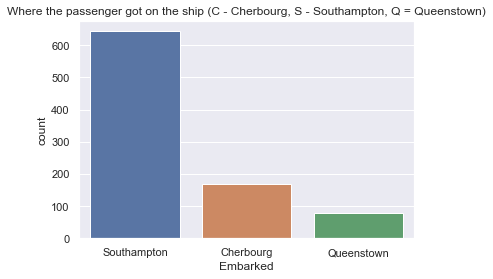

In [10]:
# Embarked
# Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)
print("Missing : ", count-train_data['Embarked'].count())
print("Unique : ", train_data['Embarked'].unique().tolist())
attr = train_data['Embarked']
attr.unique().tolist()
# ['S', 'C', 'Q', nan]
ax = sns.countplot(x='Embarked', data=train_data)
plt.title("Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)")
plt.xticks(np.arange(3), ('Southampton','Cherbourg', 'Queenstown'))
plt.show(ax)

# It is evident that most of the people are from Southampton. Very few people are from Queenstown.
# So the chance of missing value being a person boarded in Southampton is high.


#### 1.3.3 Sex

Missing :  0
Unique :  ['male', 'female']


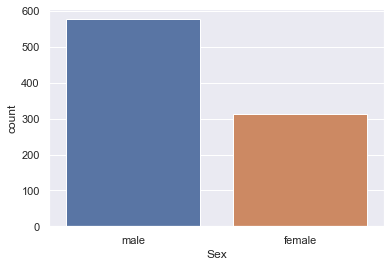

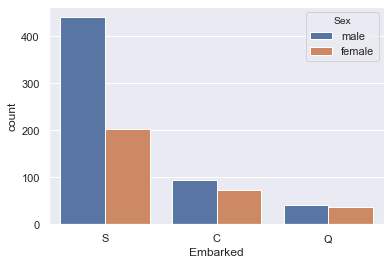

In [11]:
# Sex
print("Missing : ", count-train_data['Sex'].count())
print("Unique : ", train_data['Sex'].unique().tolist())

ax1 = sns.countplot(x='Sex', data=train_data)
# Q1 : Male are greater than female. Hence the data is skewed... WHAT TO DO?

# Sex in comparison with Embarked
# sns.catplot(x='Sex', 
#             data=train_data,  
#             col='Embarked', 
#             kind="count",
#             height=4, aspect=.7)
plt.show(ax1)

ax2 = sns.countplot(hue="Sex", x="Embarked", data=train_data)
plt.show(ax2)

# From every city, male are boarded more than female. So if only the male data is considered
# model will be biased. HOW TO SOLVE IT?

# Chance of a missing vale being S if S=M is higher. 
#          At the same 

### 1.3.4 Cabin
### <font color='red'>REVISIT ATTRIBUTE</font>
Due to high number of missing values, Cabin attribute has been left from model building
Assuming that the value is crucial, variable is marked to re visit

Missing :  687
Unique :  [nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'E121', 'D11', 'E77', 

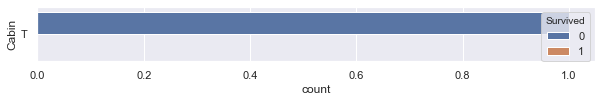

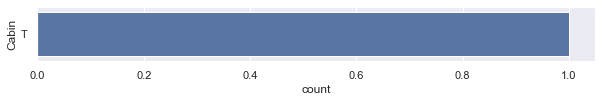

In [12]:
# Cabin
print("Missing : ", count-train_data['Cabin'].count())
print("Unique : ", train_data['Cabin'].unique().tolist())


# fig = plt.figure(figsize=(25, 100))
# ax = sns.countplot(y=train_data.Cabin, hue=train_data.Survived)
# plt.show(ax)

# fig = plt.figure(figsize=(25, 100))
# ax = sns.countplot(y=train_data.Cabin)
# plt.show(ax)

fig = plt.figure(figsize=(10, 1))
ax = sns.countplot(y=train_data[train_data.Cabin=='T'].Cabin, hue=train_data.Survived)
plt.show(ax)

fig = plt.figure(figsize=(10, 1))
ax = sns.countplot(y=train_data[train_data.Cabin=='T'].Cabin)
plt.show(ax)
    
# There is some pattern that can identified 
# Possible relations with price of the ticket, 

# Checking only for T. Seems like none of the passengers in T cabin are alive

#### 1.3.5 Ticket

In [13]:
# Ticket
print("Missing : ", count-train_data['Ticket'].count())
#print("Unique : ", train_data['Ticket'].unique().tolist())
print("Unique count : ", len(train_data['Ticket'].unique().tolist()))

## Something is suspecious. Missing values are 0, How come unique count is only 681?
# Identify if there are any common tickets

Missing :  0
Unique count :  681


## 1.4. Plotting graphs for Numerical attributes

In [14]:
num_vars = tr_info[tr_info['Data Type'] != 'object'].index.tolist()
num_vars

['Age', 'PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [15]:
# How to visualize numeric data
# Check the distribution, mean, median, mode, SD, variance

### 1.4.1 Age

In [16]:
# age
age_df = train_data['Age']
print("Missing : ", count-age_df.count())


Missing :  177


In [17]:
cat_vars + num_vars

['Cabin',
 'Embarked',
 'Name',
 'Sex',
 'Ticket',
 'Age',
 'PassengerId',
 'Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'Fare']

## Data Cleaning

In [18]:
# Missing values

dt_train = pd.DataFrame(
    {
        'PassengerId': train_data.PassengerId,
        'Sex': train_data.Sex,
    })


In [19]:
# convert float to int
# Splitting Sex into two columns, as there is chance that model may assume that 1 is higher than 0,
# The process is called encoding. OneHotEncoder of sklearn.preprocessing is used for this.
# IMPORTANT:
# a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation)
# How to Convert Categorical Data to Numerical Data?
#This involves two steps:
#    Integer Encoding
#    One-Hot Encoding

# Integer encoding
# from sklearn.preprocessing import LabelEncoder
# lblEncoder = LabelEncoder()

# Male is 1 and Female is 0, taken automatically
#dt_train.Sex = lblEncoder.fit_transform(s)

In [20]:
# Now One-Hot encoding
# Just using Integer encoding is not enough as with Int encoding, model assumes that the values are naturally ordered
# Hence, we split the data into multiple derived columns to give equal preference to the unique values
from sklearn.preprocessing import OneHotEncoder
x = pd.get_dummies(dt_train.Sex)
dt_train = pd.concat([dt_train, x], axis='columns')
if 'Sex' in dt_train.columns.tolist():
    dt_train.drop(columns='Sex', inplace=True)

In [34]:
# Pclass
dt_train['Pclass'] = train_data['Pclass']

# Age
dt_train['Age'] = train_data['Age']
dt_train['Age'] = dt_train['Age'].fillna(dt_train['Age'].median())

# SibSp
dt_train['SibSp'] = train_data['SibSp']

# Embarked
dt_train['Embarked'] = train_data['Embarked']
# missing values will be filled with most frequent value
# also changing values from SCQ to 012
# dt_train['Embarked'].value_counts(normalize=True).plot(kind='bar', color= ['r', 'b', 'orange'])
dt_train['Embarked'] = dt_train['Embarked'].fillna("S")
dt_train.loc[dt_train['Embarked']=="S", 'Embarked'] = 0
dt_train.loc[dt_train['Embarked']=="C", 'Embarked'] = 1
dt_train.loc[dt_train['Embarked']=="Q", 'Embarked'] = 2

# Parch
dt_train['Parch'] = train_data['Parch']
dt_train['Fare'] = train_data['Fare']

# Target . - Survived\
dt_train['Survived'] = train_data['Survived']

# Applying Algorithms
* Logistic regression

In [37]:
from sklearn import linear_model
from sklearn import preprocessing

target = dt_train['Survived'].values
features = dt_train[dt_train.columns.tolist()[:-1]].values

learner = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
classifier = learner.fit(features, target)

print("Linear regression : ", round(classifier.score(features, target)*100, 2))

Linear regression :  79.91


In [ ]:
# Trying catboost
from catboost import CatBoostClassifier

learner = CatBoostClassifier()

classifier = learner.fit(features, target)

In [39]:
classifier.score(features, target)

0.9034792368125701